# Neural Networks (LTAT.02.001) project

Topic: Predict if the bus is leaving the bus stop

Team members: Märt Häkkinen, Anne Ott, Linnet Puskar Liis Simmul

Working with 567 sets of images
Working with 51995 images
Image examples: 
/Users/liissimmul/Desktop/rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002682.png
B


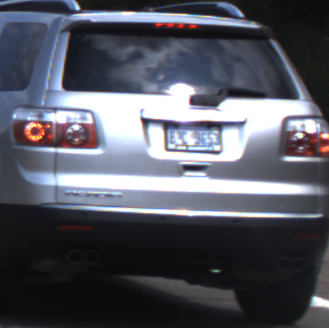

/Users/liissimmul/Desktop/rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002681.png
O


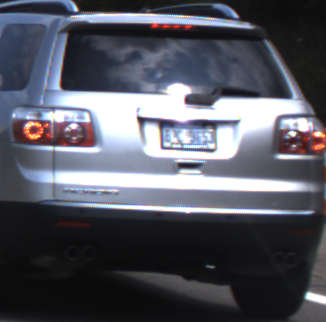

In [1]:
import os
from IPython.display import Image as _Imgdis

difficulty = "Easy"

dataset_folder = "/Users/liissimmul/Desktop/rear_signal_dataset"
X_train = []
image_count = 0


labels = []

with open("{0}/{1}.txt".format(dataset_folder, difficulty)) as f:
    content = f.readlines()
    for folder in content:
        # Load the data
        folder_components = folder.split("_")
        folder_components[-1] = folder_components[-1][:-1]
        base = str("_".join(folder_components[:-2]))
        folder = "{0}/{1}/{2}".format(dataset_folder, base, (base + "_" + str(folder_components[-2])))
        folder += "/" + (str("_".join(folder_components)))
        folder += "/light_mask"
        images = [folder + "/" + f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
        image_count += len(images)
        X_train.append({
            "images": images,
            "label" : folder_components[-2]
        })


print("Working with {0} sets of images".format(len(X_train)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    print(X_train[0]["images"][i])
    print(X_train[0]["label"][i])
    display(_Imgdis(filename=X_train[0]["images"][i], width=240, height=320))

In [2]:
import keras
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

Using TensorFlow backend.


In [3]:
#print(X_train[0]["images"][0])
#print(X_train[0]["images"][1])
img = Image.open(X_train[0]["images"][0])
# https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
img_array = img_to_array(img)
# https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
#print(img_array)
print(img_array.shape)
img2 = Image.open(X_train[500]["images"][4])
img_array2 = img_to_array(img2)
print(img_array2.shape)
# pildid on erinevate suurustega

(328, 329, 3)
(555, 629, 3)


In [4]:
print(np.asarray(X_train).shape)
print(len(X_train[0]["images"]))
print(len(X_train[1]["images"]))
print(len(X_train[566]["images"]))
print(X_train[566]["label"][0:3])

(567,)
12
299
56
BOO


In [5]:
X_train = X_train[:100]
X_train_array = []
X_train_response_array = []

for i in range(len(X_train)):
    for j in range(len(X_train[i]["images"])):
        img = Image.open(X_train[i]["images"][j])
        img_array = img_to_array(img)
        X_train_array.append(img_array)
        X_train_response_array.append(X_train[i]["label"][0:3])

In [6]:
print(X_train_array[0])

[[[ 43.  49.  65.]
  [ 45.  57.  78.]
  [ 44.  45.  90.]
  ...
  [ 13.  12.  13.]
  [ 13.  12.  12.]
  [ 13.  12.  12.]]

 [[ 76.  84.  85.]
  [ 79.  87. 109.]
  [ 79.  99. 132.]
  ...
  [ 13.  12.  12.]
  [ 13.  13.  13.]
  [ 13.  13.  13.]]

 [[110. 137. 136.]
  [112. 129. 148.]
  [114. 139. 160.]
  ...
  [ 13.  12.  13.]
  [ 12.  13.  13.]
  [ 13.  13.  14.]]

 ...

 [[ 55.  56.  57.]
  [ 55.  51.  52.]
  [ 49.  46.  46.]
  ...
  [ 83.  80.  82.]
  [ 81.  79.  83.]
  [ 81.  80.  83.]]

 [[ 66.  65.  62.]
  [ 66.  57.  58.]
  [ 55.  47.  55.]
  ...
  [ 84.  80.  82.]
  [ 82.  80.  82.]
  [ 81.  80.  82.]]

 [[ 68.  66.  67.]
  [ 68.  63.  65.]
  [ 61.  59.  63.]
  ...
  [ 84.  80.  82.]
  [ 83.  80.  82.]
  [ 82.  80.  81.]]]


In [7]:
print(X_train_response_array[0])

BOO
